# A1

Using a time series model, is there a seasonal trend of when revenue increases and decreases? A decrease in revenue could possibly indicate customer churn and from there analayze if there is a seasonal trend indicating if there is a pattern in customer churning. 

# A2

The goal is to build a time series model where we can predict future revenue predictions, observe seasonality trends and patterns. A decrease in revenue can indicate customer churn.

# B

- Data does not contain anomalies
- Model parameters and error term is constant
- Historic timepoints dictate behavior of present timepoints which might not hold in stressed market data conditions 
- Time series is stationary

# C1

In [1]:
# import a couple of libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from tqdm import tqdm_notebook
from itertools import product
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred)/y_true))*100
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
# import data
df = pd.read_csv("teleco_time_series .csv", index_col='Day', parse_dates=True)
# look at the head
df.head(10)

,Revenue
Day,
1,0.000000
2,0.000793
3,0.825542
4,0.320332
5,1.082554
6,0.107654
7,0.493901
8,0.376698
9,0.304075


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 1 to 731
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Revenue  731 non-null    float64
dtypes: float64(1)
memory usage: 11.4 KB


In [3]:
df.duplicated()

Day
1      False
2      False
3      False
4      False
5      False
       ...  
727    False
728    False
729    False
730    False
731    False
Length: 731, dtype: bool

In [4]:
df.isnull().any()

Revenue    False
dtype: bool

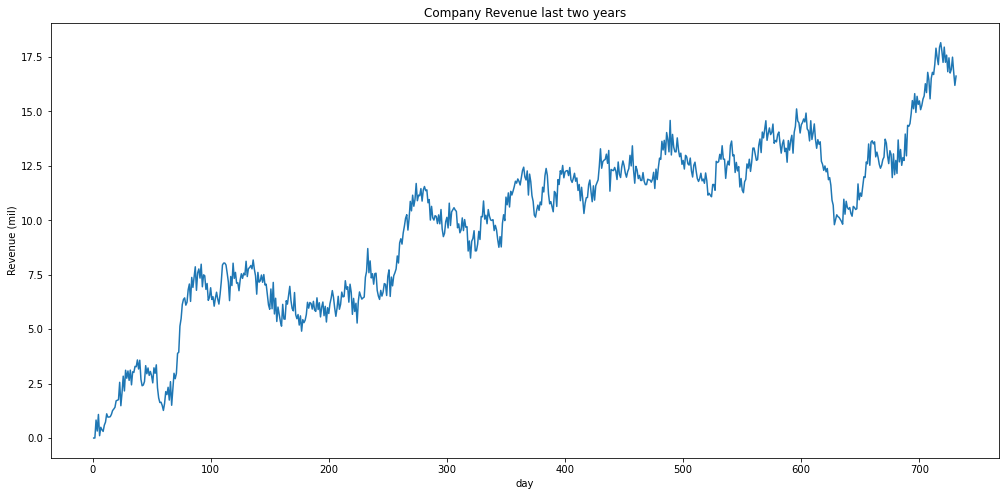

In [5]:
#Visual line graph of the time series

plt.figure(figsize=(17, 8))
plt.plot(df.Revenue)
plt.title('Company Revenue last two years')
plt.xlabel('day')
plt.ylabel('Revenue (mil)')
plt.grid(False)
plt.show()

# C2

The time step format of this dataset is measured in days, it can be seen that the data type for day is in integers. It also shows that there are no gaps in the dataset. The length of the sequence is 731 data points. Also the dataset shows that there are no duplicates.

# C3

As seen on the 'Company Revenue last two years' plot, the can be see that it is non-stationary as the plot has an upward trend.

# C4

- 1) understand the dataframe using the .info() function
- 2) convert time column into datetime format if column is stored as string
- 3) check for trend, seasonality, and noise
- 4) test for stationarity using dickey fuller test. Make the data stationary
- 5) split data in train and test set training, early data will be used for training, later data will be used for testing

# C5

In [6]:
import math
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA

In [7]:
df

,Revenue
Day,
1,0.000000
2,0.000793
3,0.825542
4,0.320332
5,1.082554
...,...
727,16.931559
728,17.490666
729,16.803638


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 1 to 731
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Revenue  731 non-null    float64
dtypes: float64(1)
memory usage: 11.4 KB


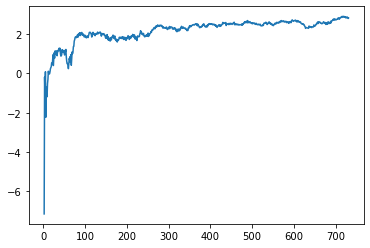

In [9]:
lndf = np.log(df)
lndf
plt.plot(lndf)
plt.show()

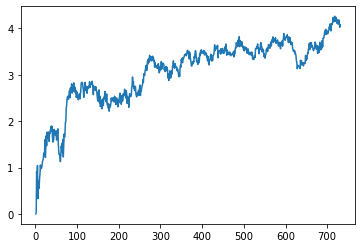

In [10]:
sqrtdf = np.sqrt(df)
plt.plot(sqrtdf)
plt.show()

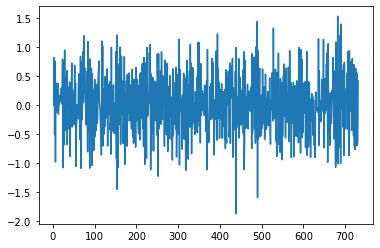

In [11]:
# taking the difference makes the dataset stationary
diffdf = df.diff()
plt.plot(diffdf)
plt.show()

In [12]:
#taking the difference to make it more stationary

df_stationary = df.diff().dropna()
df_stationary

,Revenue
Day,
2,0.000793
3,0.824749
4,-0.505210
5,0.762222
6,-0.974900
...,...
727,0.170280
728,0.559108
729,-0.687028


In [13]:
#copy of cleaned dataset
df_stationary.to_csv('df_prepared_PA1.csv')

In [14]:
# train and split the dataset
df_train = df_stationary.loc[:'548']
df_test = df_stationary.loc['549':]

In [15]:
from scipy import signal

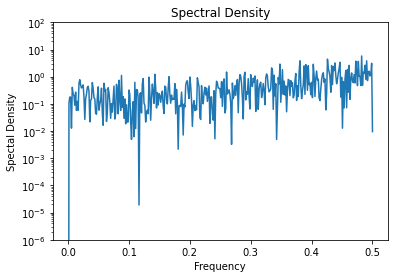

In [16]:
f, Pxx_den = signal.periodogram(df_stationary['Revenue'])
plt.semilogy(f, Pxx_den)
plt.ylim([1e-6, 1e2])
plt.title('Spectral Density')
plt.xlabel('Frequency')
plt.ylabel('Spectal Density')
plt.show()

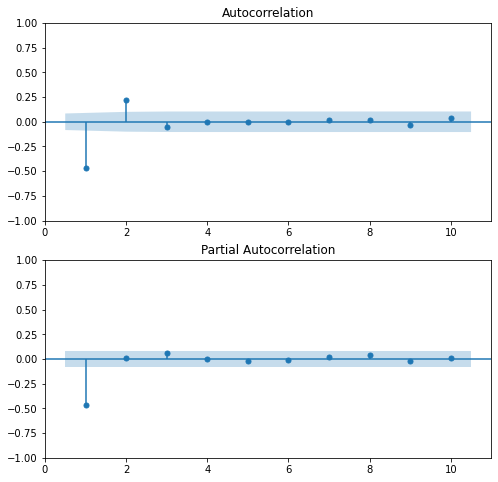

In [17]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,8))
plot_acf(df_train, lags=10, zero=False, ax=ax1)
plot_pacf(df_train, lags=10, zero=False, ax=ax2)
plt.show()


From the ACF and PACF possible AR(1), AR(2)

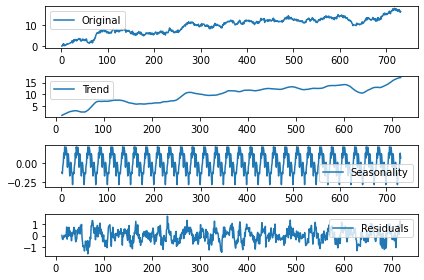

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df, model='additive', period =25)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


In [19]:
from statsmodels.tsa.stattools import adfuller

In [20]:
results = adfuller(df)
print(results)
# p-value is greater than 0.05 so we accept the null-hypothesis and it is non-stationary

(-1.9246121573101798, 0.32057281507939817, 1, 729, {'1%': -3.4393520240470554, '5%': -2.8655128165959236, '10%': -2.5688855736949163}, 965.0609576707513)


In [21]:
results = adfuller(df_stationary)
print(results)

(-44.874527193875984, 0.0, 0, 729, {'1%': -3.4393520240470554, '5%': -2.8655128165959236, '10%': -2.5688855736949163}, 965.5032159185916)


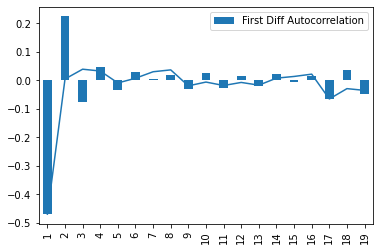

In [22]:
result = ts.adfuller(df, 1)
result
df_diff = df-df.shift()
diff=df_diff.dropna()
acf_1_diff = acf(diff)[1:20]
test_df = pd.DataFrame([acf_1_diff]).T
test_df.columns = ['First Diff Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
pacf_1_diff = pacf(diff)[1:20]
plt.plot(pacf_1_diff)
plt.show()

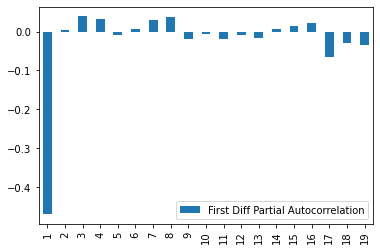

In [23]:
test_df = pd.DataFrame([pacf_1_diff]).T
test_df.columns = ['First Diff Partial Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
plt.show()

In [24]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

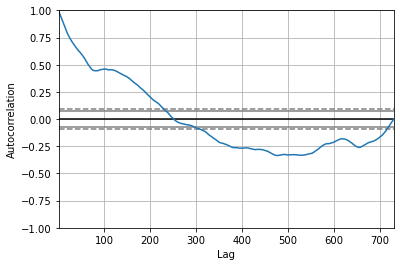

In [25]:
autocorrelation_plot(df)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

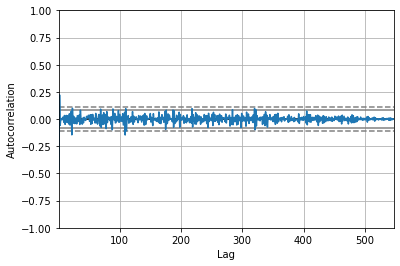

In [26]:
autocorrelation_plot(df_train)

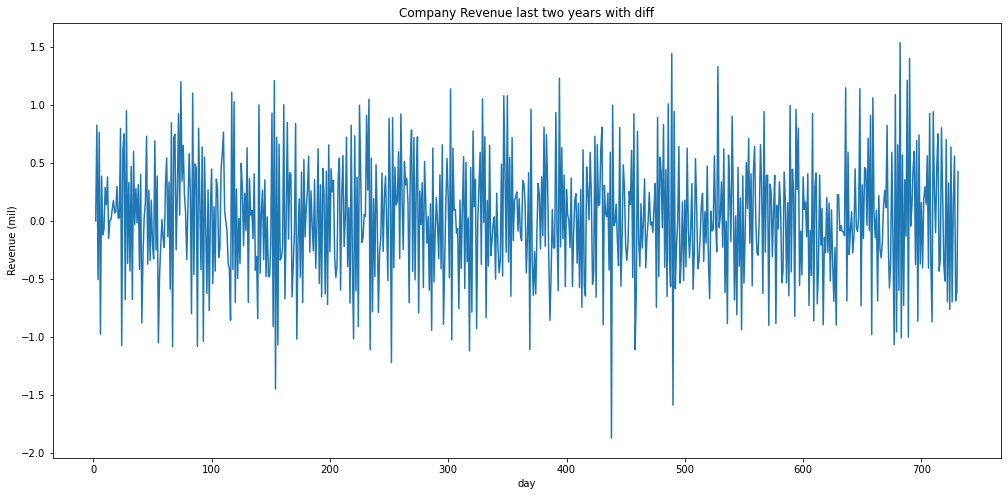

In [27]:
plt.figure(figsize=(17, 8))
plt.plot(df_stationary)
plt.title('Company Revenue last two years with diff')
plt.xlabel('day')
plt.ylabel('Revenue (mil)')
plt.grid(False)
plt.show()

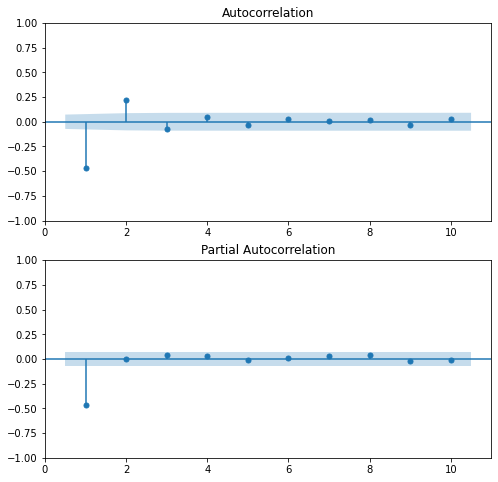

In [28]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,8))
plot_acf(df_stationary, lags=10, zero=False, ax=ax1)
plot_pacf(df_stationary, lags=10, zero=False, ax=ax2)
plt.show()

Model order could be an AR(p) with ACF tailing off, and PACF cut off after lag

In [29]:
model_1 = sm.tsa.arima.ARIMA(df_stationary, order=(1,0,1))
results_2=model_1.fit()

In [30]:
print(results_2.summary())

                               SARIMAX Results                                
Dep. Variable:                Revenue   No. Observations:                  730
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -488.553
Date:                Sat, 11 Jun 2022   AIC                            985.106
Time:                        15:23:44   BIC                           1003.478
Sample:                             0   HQIC                           992.194
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0226      0.012      1.890      0.059      -0.001       0.046
ar.L1         -0.4763      0.068     -7.020      0.000      -0.609      -0.343
ma.L1          0.0091      0.077      0.118      0.9

In [31]:
print(results_2.params)

const     0.022598
ar.L1    -0.476293
ma.L1     0.009058
sigma2    0.223189
dtype: float64


In [32]:
results_2 = adfuller(df_stationary)
print(results_2)
# test statistic (-44.87) indicates that it is more likely to be stationary being more negative
# p-value (0.0) being smaller than 0.05 indicates to reject the null hypothesis reject non-stationary

(-44.874527193875984, 0.0, 0, 729, {'1%': -3.4393520240470554, '5%': -2.8655128165959236, '10%': -2.5688855736949163}, 965.5032159185916)


# D1

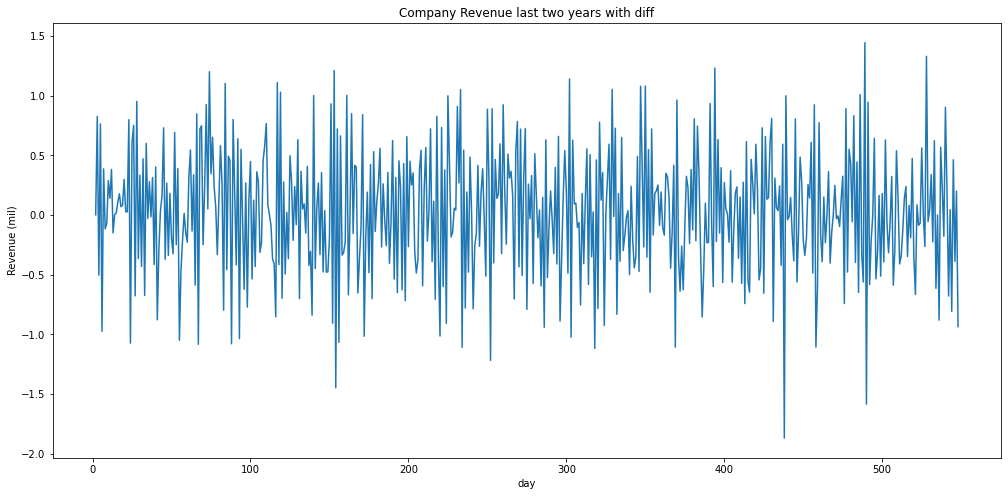

In [33]:
plt.figure(figsize=(17, 8))
plt.plot(df_train)
plt.title('Company Revenue last two years with diff')
plt.xlabel('day')
plt.ylabel('Revenue (mil)')
plt.grid(False)
plt.show()

In [34]:
df_trainstat = df_train.diff().dropna()
df_trainstat

,Revenue
Day,
3,0.823955
4,-1.329958
5,1.267431
6,-1.737122
7,1.361148
...,...
544,-0.851141
545,1.269607
546,-0.851376


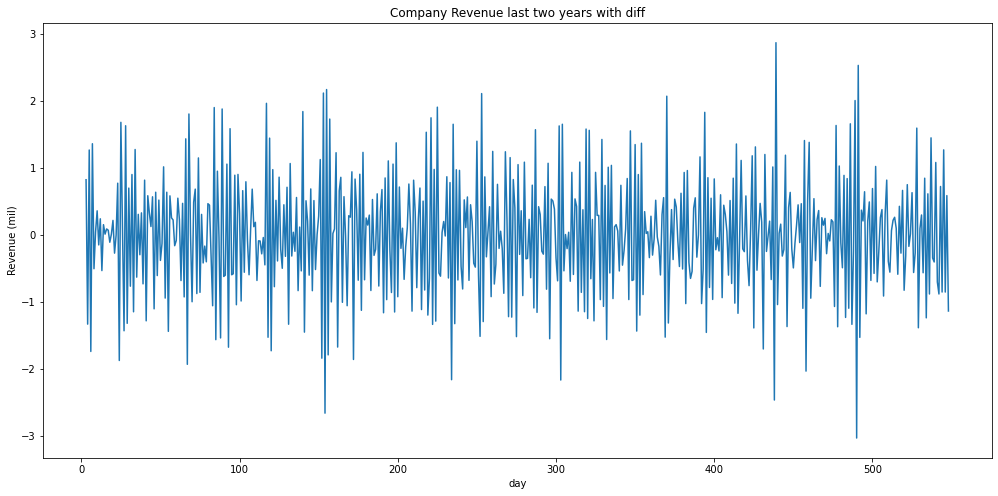

In [35]:
plt.figure(figsize=(17, 8))
plt.plot(df_trainstat)
plt.title('Company Revenue last two years with diff')
plt.xlabel('day')
plt.ylabel('Revenue (mil)')
plt.grid(False)
plt.show()

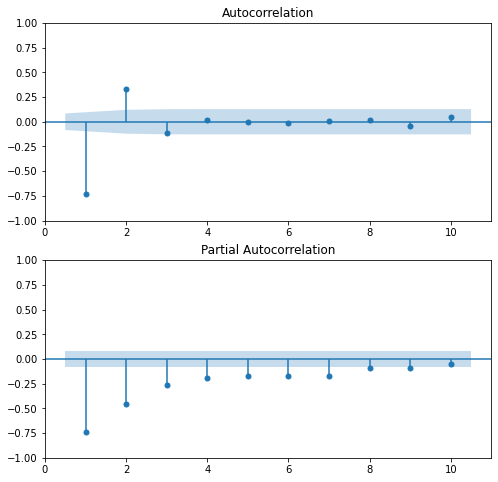

In [36]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,8))
plot_acf(df_trainstat, lags=10, zero=False, ax=ax1)
plot_pacf(df_trainstat, lags=10, zero=False, ax=ax2)
plt.show()

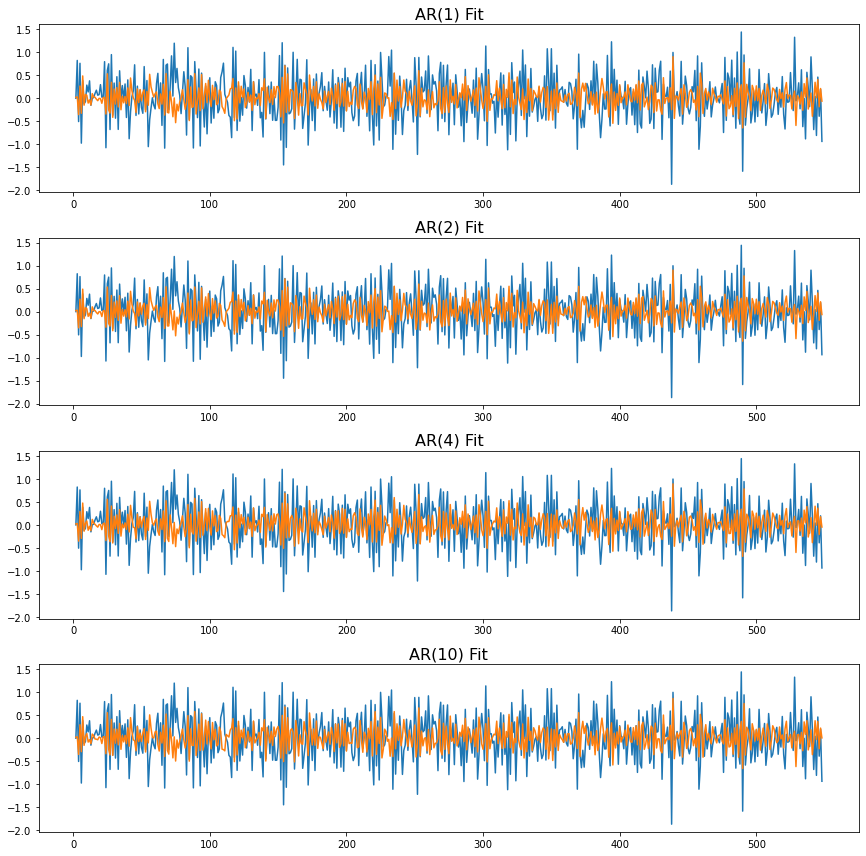

In [79]:
plt.figure(figsize=(12,12))

ar_orders = [1,2,4,10]
fitted_model_dict = {}
for idx, ar_order in enumerate(ar_orders):
    ar_model = sm.tsa.arima.ARIMA(df_train, order=(ar_order,0,0))
    ar_model_fit = ar_model.fit()
    fitted_model_dict[ar_order] = ar_model_fit
    plt.subplot(4,1,idx+1)
    plt.plot(df_train)
    plt.plot(ar_model_fit.fittedvalues)
    plt.title('AR(%s) Fit'%ar_order, fontsize=16)
    
plt.tight_layout()

In [81]:
# AIC comparision
for ar_order in ar_orders:
    print('AIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].aic))

AIC for AR(1): 731.041126224867
AIC for AR(2): 733.0197432237045
AIC for AR(4): 734.9418459737365
AIC for AR(10): 745.4908786379765


In [82]:
# BIC comparision
for ar_order in ar_orders:
    print('BIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].bic))

BIC for AR(1): 743.9544726321329
BIC for AR(2): 750.2375384333924
BIC for AR(4): 760.7685387882683
BIC for AR(10): 797.1442642670403


In [37]:
#AR model
model_train = sm.tsa.arima.ARIMA(df_trainstat, order=(1,0,0))
results_train=model_train.fit()

In [38]:
print(results_train.summary())

                               SARIMAX Results                                
Dep. Variable:                Revenue   No. Observations:                  546
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -510.372
Date:                Sat, 11 Jun 2022   AIC                           1026.745
Time:                        15:23:45   BIC                           1039.653
Sample:                             0   HQIC                          1031.791
                                - 546                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0015      0.015     -0.097      0.922      -0.031       0.028
ar.L1         -0.7356      0.029    -24.979      0.000      -0.793      -0.678
sigma2         0.3791      0.023     16.419      0.0

In [39]:
#AR MA model
model_train = sm.tsa.arima.ARIMA(df_trainstat, order=(2,1,0))
results_train=model_train.fit()
print(results_train.summary())

                               SARIMAX Results                                
Dep. Variable:                Revenue   No. Observations:                  546
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -642.451
Date:                Sat, 11 Jun 2022   AIC                           1290.903
Time:                        15:23:45   BIC                           1303.805
Sample:                             0   HQIC                          1295.947
                                - 546                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3056      0.035    -36.856      0.000      -1.375      -1.236
ar.L2         -0.6181      0.034    -17.928      0.000      -0.686      -0.550
sigma2         0.6163      0.039     15.659      0.0

In [40]:
results_train = adfuller(df_trainstat)
print(results_train)

(-8.47465136185803, 1.446355925327804e-13, 19, 526, {'1%': -3.442843345332837, '5%': -2.867050445147657, '10%': -2.5697048674984457}, 769.318792019373)


In [41]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

forecast_train = results_train.get_prediction(start=-25)

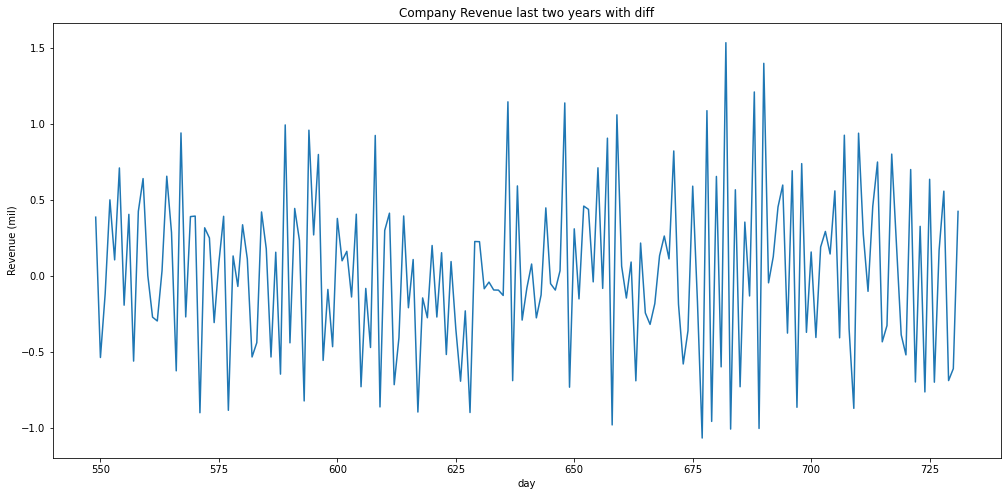

In [42]:
plt.figure(figsize=(17, 8))
plt.plot(df_test)
plt.title('Company Revenue last two years with diff')
plt.xlabel('day')
plt.ylabel('Revenue (mil)')
plt.grid(False)
plt.show()

In [43]:
df_teststat = df_test.diff().dropna()
df_teststat

,Revenue
Day,
550,-0.923174
551,0.419279
552,0.617951
553,-0.394920
554,0.604819
...,...
727,0.868058
728,0.388827
729,-1.246136


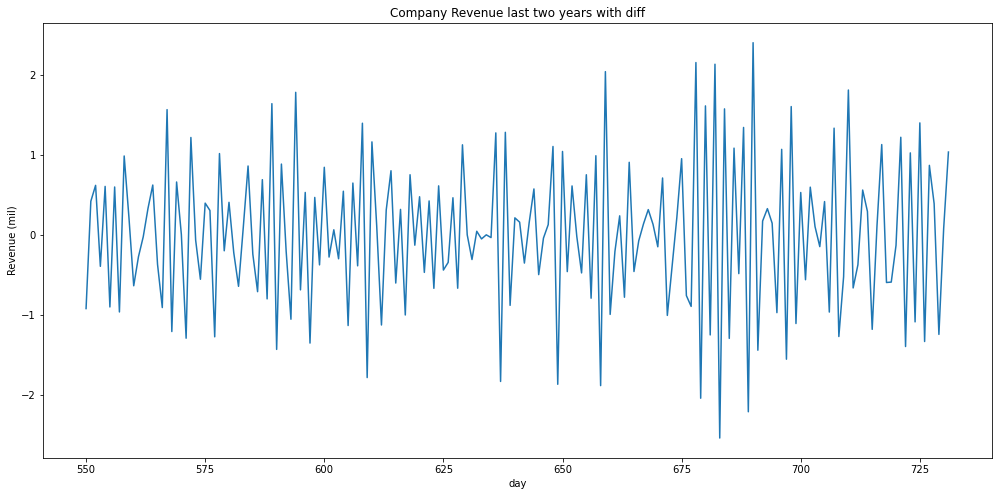

In [44]:
plt.figure(figsize=(17, 8))
plt.plot(df_teststat)
plt.title('Company Revenue last two years with diff')
plt.xlabel('day')
plt.ylabel('Revenue (mil)')
plt.grid(False)
plt.show()

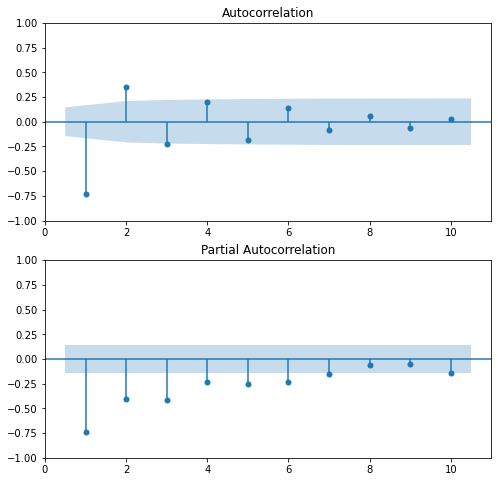

In [45]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,8))
plot_acf(df_teststat, lags=10, zero=False, ax=ax1)
plot_pacf(df_teststat, lags=10, zero=False, ax=ax2)
plt.show()

In [46]:
model_test = sm.tsa.arima.ARIMA(df_teststat, order=(1,0,0))
results_test=model_test.fit()

In [47]:
print(results_test.summary())

                               SARIMAX Results                                
Dep. Variable:                Revenue   No. Observations:                  182
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -177.018
Date:                Sat, 11 Jun 2022   AIC                            360.036
Time:                        15:23:46   BIC                            369.648
Sample:                             0   HQIC                           363.933
                                - 182                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.639e-05      0.027     -0.002      0.998      -0.054       0.054
ar.L1         -0.7359      0.055    -13.486      0.000      -0.843      -0.629
sigma2         0.4078      0.049      8.273      0.0

In [48]:
results_test = adfuller(df_teststat)
print(results_test)

(-7.471196949355127, 5.049555687564885e-11, 10, 171, {'1%': -3.4691814633722453, '5%': -2.878595143532943, '10%': -2.5758625549741803}, 252.23184021380433)


In [49]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [50]:
model_3 = SARIMAX(df_stationary, order=(1,1,0))
results_3 = model_3.fit()

In [51]:
forecast=results_3.get_prediction(start=25)
mean_forecast=forecast.predicted_mean

In [52]:
confidence_intervals = forecast.conf_int()

In [53]:
#creating ARMA data
from statsmodels.tsa.arima_process import arma_generate_sample
ar_coefs = [1, -0.5]
ma_coefs = [1, 0.2]
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)

In [54]:
#fitting and ARMA model
model = sm.tsa.arima.ARIMA(y, order=(1,0,0))
results_1 =model.fit()

In [55]:
print(results_1.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -75.931
Date:                Sat, 11 Jun 2022   AIC                            157.863
Time:                        15:23:46   BIC                            165.678
Sample:                             0   HQIC                           161.026
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0069      0.145     -0.048      0.962      -0.291       0.277
ar.L1          0.6255      0.081      7.690      0.000       0.466       0.785
sigma2         0.2660      0.043      6.126      0.0

In [56]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()

    rolstd = pd.Series(timeseries).rolling(window=12).std()
#Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

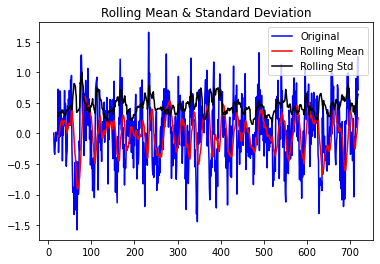

Results of Dickey-Fuller Test:
Test Statistic                -9.726780e+00
p-value                        9.229078e-17
#Lags Used                     8.000000e+00
Number of Observations Used    6.980000e+02
Critical Value (1%)           -3.439753e+00
Critical Value (5%)           -2.865690e+00
Critical Value (10%)          -2.568980e+00
dtype: float64


In [57]:
df_decompose = residual
df_decompose.dropna(inplace=True)
test_stationarity(df_decompose)

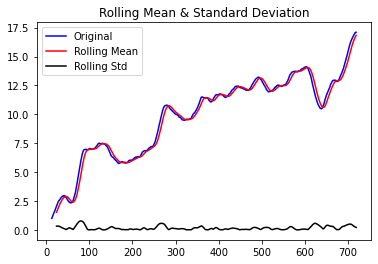

Results of Dickey-Fuller Test:
Test Statistic                  -1.476199
p-value                          0.545251
#Lags Used                      17.000000
Number of Observations Used    689.000000
Critical Value (1%)             -3.439877
Critical Value (5%)             -2.865744
Critical Value (10%)            -2.569009
dtype: float64


In [58]:
df_trend = trend
df_trend.dropna(inplace=True)
test_stationarity(df_trend)

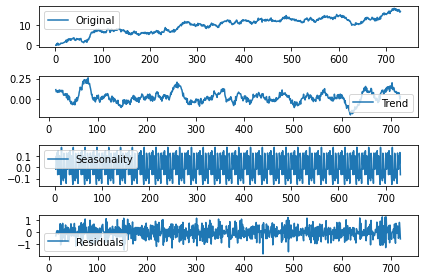

In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_stationary, model='additive', period =25)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


In [60]:
type(decomposition)

statsmodels.tsa.seasonal.DecomposeResult

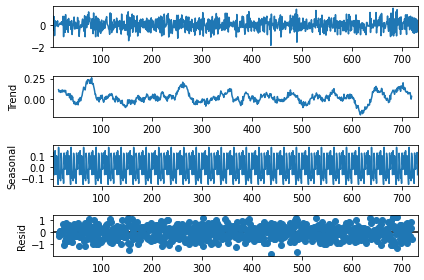

In [61]:
decomposition.plot()
plt.show()

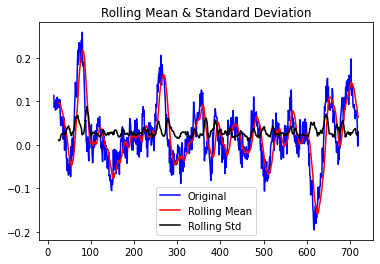

Results of Dickey-Fuller Test:
Test Statistic                -6.265448e+00
p-value                        4.124815e-08
#Lags Used                     1.600000e+01
Number of Observations Used    6.890000e+02
Critical Value (1%)           -3.439877e+00
Critical Value (5%)           -2.865744e+00
Critical Value (10%)          -2.569009e+00
dtype: float64


In [62]:
df_trend = trend
df_trend.dropna(inplace=True)
test_stationarity(df_trend)

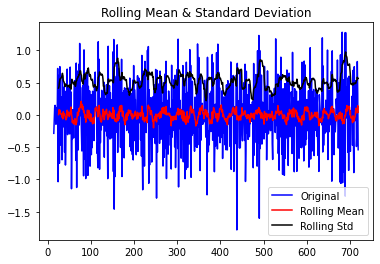

Results of Dickey-Fuller Test:
Test Statistic                -9.658446e+00
p-value                        1.373933e-16
#Lags Used                     1.900000e+01
Number of Observations Used    6.860000e+02
Critical Value (1%)           -3.439918e+00
Critical Value (5%)           -2.865762e+00
Critical Value (10%)          -2.569019e+00
dtype: float64


In [63]:
df_decompose = residual
df_decompose.dropna(inplace=True)
test_stationarity(df_decompose)

In [64]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [65]:
import pmdarima as pm

In [66]:
pmresults = pm.auto_arima(df)
print(pmresults)

 ARIMA(1,1,0)(0,0,0)[0] intercept


In [67]:
print(pmresults.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  731
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -488.561
Date:                Sat, 11 Jun 2022   AIC                            983.122
Time:                        15:23:53   BIC                            996.901
Sample:                             0   HQIC                           988.438
                                - 731                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0332      0.018      1.895      0.058      -0.001       0.068
ar.L1         -0.4692      0.033    -14.296      0.000      -0.534      -0.405
sigma2         0.2232      0.013     17.801      0.0

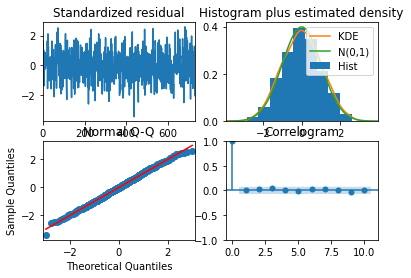

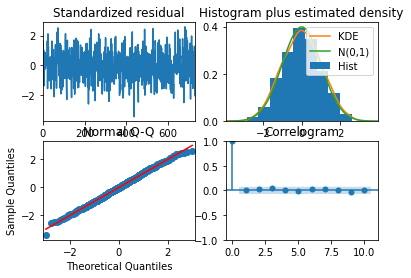

In [68]:
pmresults.plot_diagnostics()

In [69]:
pmresultstationary = pm.auto_arima(df_stationary)
print(pmresultstationary)

 ARIMA(1,0,0)(0,0,0)[0] intercept


In [70]:
print(pmresultstationary.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  730
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -488.561
Date:                Sat, 11 Jun 2022   AIC                            983.122
Time:                        15:23:54   BIC                            996.901
Sample:                             0   HQIC                           988.438
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0332      0.018      1.895      0.058      -0.001       0.068
ar.L1         -0.4692      0.033    -14.296      0.000      -0.534      -0.405
sigma2         0.2232      0.013     17.801      0.0

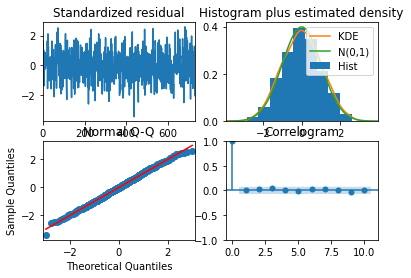

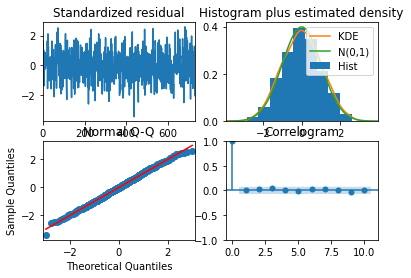

In [71]:
pmresultstationary.plot_diagnostics()

- as observed in the decomposition visualizations, a seasonality is observed with the original dataset as well as the stationary dataset.
- with the original dataset there is a positive trend, after differencing to be stationary the dataset loses the trend and is stationary.
- the auto correlation function shows that the data is not correlated, ACF and PACF both tail of indicating an ARMA(p,q) model order 
- 

# D2

# D3

# D4

# D5

# E1

# E2

# E3

# F

# G

# H

# I